In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
####frop unessary column
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [6]:
##check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

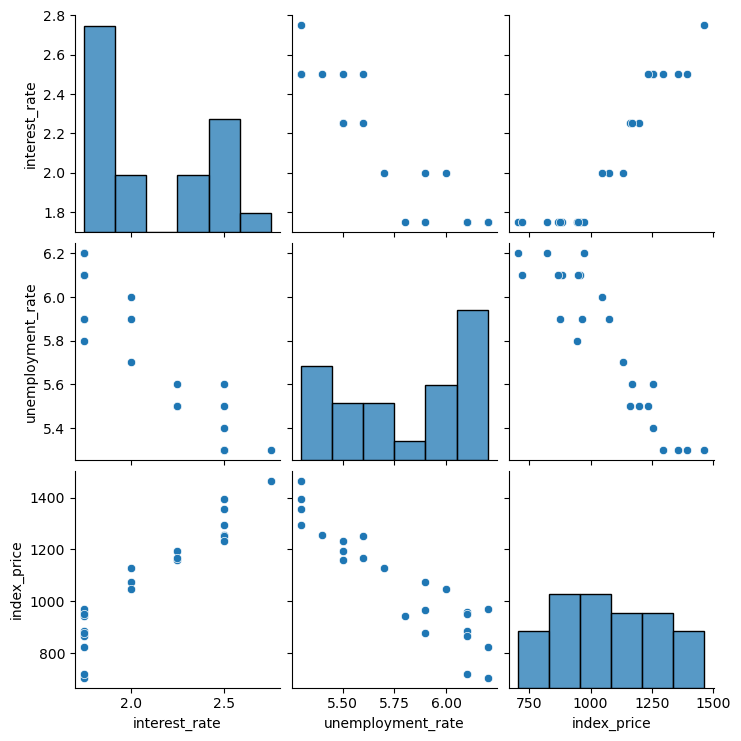

In [7]:
#####lets do some visulization
import seaborn as sns
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

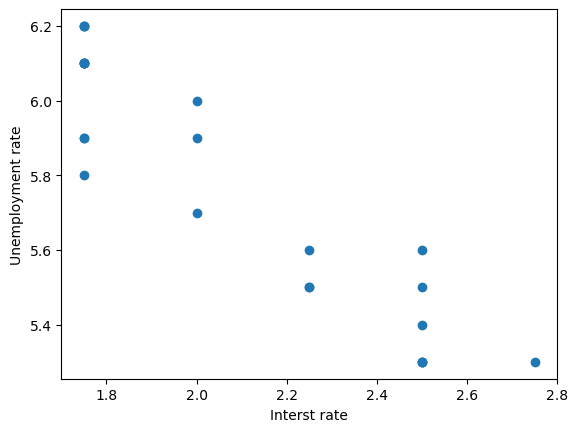

In [9]:
####visualize datat more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interst rate")
plt.ylabel("Unemployment rate")

In [10]:
###### independent and dependent feature 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y


0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
###train test spllit 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [14]:
y_train


13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression=LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
##prediction
y_pred=regression.predict(X_test)

In [21]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [22]:
###preformance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

73.80444932337099
8108.567426306611
8.59095159591596


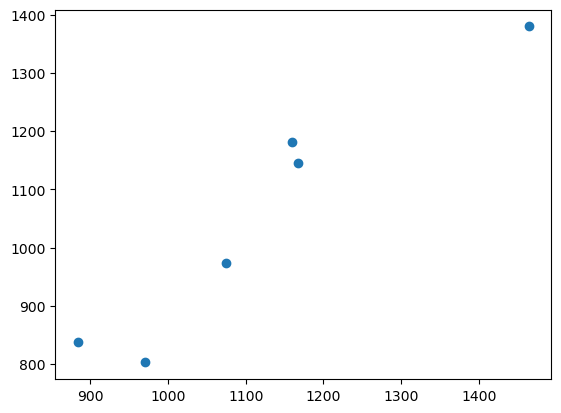

In [24]:
plt.scatter(y_test,y_pred)

In [25]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


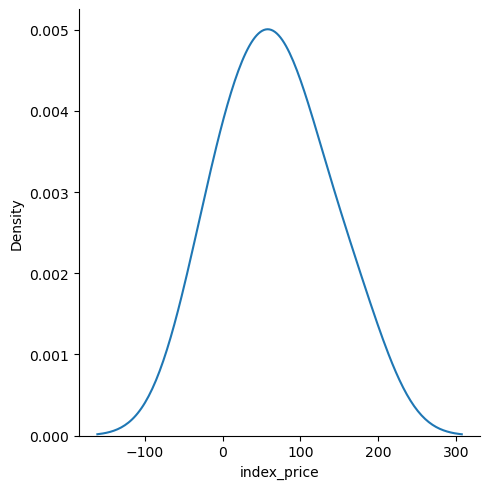

In [26]:
import seaborn as sns
sns.displot(residuals,kind='kde')

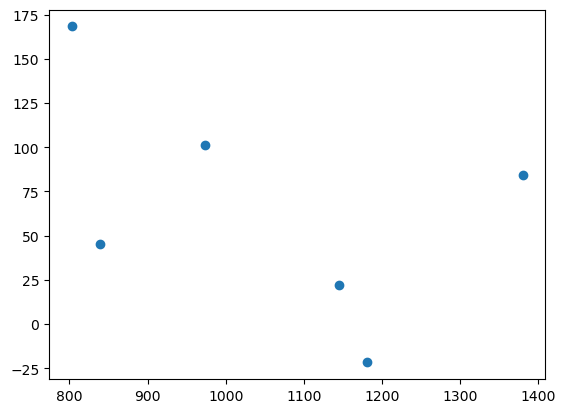

In [27]:
#### scatter plot with respect to predicition and residuals 
plt.scatter(y_pred,residuals)

In [28]:
##ols kinear regression 
import statsmodels.api as sm

In [29]:
model=sm.OLS(y_train,X_train).fit()

In [30]:
model.summary()

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                       0.754
Time:                        13:30:16   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print(regression.coef_)

[  88.27275507 -116.25716066]
